In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_15 = pd.read_csv("2015.csv")
data_16 = pd.read_csv("2016.csv")
data_17 = pd.read_csv("2017.csv")
data_18 = pd.read_csv("2018.csv")
data_19 = pd.read_csv("2019.csv")
data_20 = pd.read_csv("2020.csv")
data_21 = pd.read_csv("2021.csv")
data_22 = pd.read_csv("2022.csv")

In [8]:
data_15 = data_15.iloc[:, :4]
data_16 = data_16.iloc[:, :4]
data_17 = data_17.iloc[:, :4]
data_18 = data_18.iloc[:, :4]
data_19 = data_19.iloc[:, :4]
data_20 = data_20.iloc[:, :4]
data_21 = data_21.iloc[:, :4]
data_22 = data_22.iloc[:, :4]

In [9]:
data_15['Year'] = 2015
data_16['Year'] = 2016
data_17['Year'] = 2017
data_18['Year'] = 2018
data_19['Year'] = 2019
data_20['Year'] = 2020
data_21['Year'] = 2021
data_22['Year'] = 2022

In [10]:
data_15 = data_15.drop(columns='Region')
data_15 = data_15.drop(columns='Happiness Rank')
data_16 = data_16.drop(columns='Region')
data_16 = data_16.drop(columns='Happiness Rank')

In [11]:
data_17 = data_17.drop(columns='Whisker.high')
data_17 = data_17.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score'})
data_17 = data_17.drop(columns='Happiness Rank')

In [12]:
data_18 = data_18.drop(columns='GDP per capita')
data_18 = data_18.drop(columns='Overall rank')
data_18 = data_18.rename(columns={'Country or region': 'Country'})
data_18 = data_18.rename(columns={'Score': 'Happiness Score'})
data_19 = data_19.drop(columns='GDP per capita')
data_19 = data_19.drop(columns='Overall rank')
data_19 = data_19.rename(columns={'Country or region': 'Country'})
data_19 = data_19.rename(columns={'Score': 'Happiness Score'})

In [13]:
data_20 = data_20.drop(columns='Regional indicator')
data_20 = data_20.drop(columns='Standard error of ladder score')
data_20 = data_20.rename(columns={'Ladder score': 'Happiness Score'})
data_20 = data_20.rename(columns={'Country name': 'Country'})
data_21 = data_21.drop(columns='Regional indicator')
data_21 = data_21.drop(columns='Standard error of ladder score')
data_21 = data_21.rename(columns={'Ladder score': 'Happiness Score'})
data_21 = data_21.rename(columns={'Country name': 'Country'})

In [14]:
data_22 = data_22.drop(columns='Whisker-high')
data_22 = data_22.drop(columns='RANK')
data_22 = data_22.drop(data_22.index[-1])
data_22 = data_22.rename(columns={'Happiness score': 'Happiness Score'})
data_22['Happiness Score'] = data_22['Happiness Score'].str.replace(',', '').astype(float)
data_22['Happiness Score'] = data_22['Happiness Score'] / 1000

In [15]:
data_16

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016
...,...,...,...
152,Benin,3.484,2016
153,Afghanistan,3.360,2016
154,Togo,3.303,2016
155,Syria,3.069,2016


In [16]:
happy_df = pd.concat([data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22])
happy_df['Country'] = data_22['Country'].replace('*', '') #not working

In [17]:
happy_df

,Country,Happiness Score,Year
0,Finland,7.587,2015
1,Denmark,7.561,2015
2,Iceland,7.527,2015
3,Switzerland,7.522,2015
4,Netherlands,7.427,2015
...,...,...,...
141,Botswana*,3.471,2022
142,Rwanda*,3.268,2022
143,Zimbabwe,2.995,2022
144,Lebanon,2.955,2022


In [18]:
population_df = pd.read_csv("population_by_country_2020.csv")
population_df = population_df.iloc[:, :2]

In [19]:
data = pd.read_csv("total_deaths.csv")
death_df = pd.DataFrame(data)
death_df = death_df.iloc[12:]
death_df = death_df.iloc[::60, :]
death_df.fillna(0, inplace=True)

In [20]:
pop_series = population_df.set_index('Country (or dependency)')['Population (2020)']
death_div_pop = death_df.div(pop_series, axis=1)
death_div_pop.fillna(0, inplace=True)

In [21]:
death_div_pop = death_div_pop.rename(columns={'date': 'average'})

In [22]:
#deleting all countries / regions that have zero deaths / no population data resulting in zeros across every row
last_row = death_div_pop.iloc[-1]
null_cols = last_row == 0
cols_to_keep = ~null_cols
death_div_pop = death_div_pop.loc[:, cols_to_keep]

In [23]:
death_div_pop

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
12,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
72,0.000000,3.474128e-07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.995069e-07,0.000000,...,7.962946e-07,2.087048e-07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.374239e-07
132,0.000004,1.076980e-05,0.000012,0.000000,0.000634,0.000000e+00,0.000000,0.000031,1.616006e-05,0.000017,...,4.964012e-04,2.569730e-04,0.000005,3.296487e-07,0.000000,3.514713e-07,0.000000e+00,4.378990e-07,4.925197e-07,5.398782e-07
192,0.000026,3.091974e-05,0.000023,0.000000,0.000673,7.964519e-07,0.000000,0.000031,1.282164e-04,0.000193,...,6.058180e-04,4.176727e-04,0.000009,1.828052e-06,0.000000,2.987506e-06,0.000000e+00,1.408014e-05,4.542127e-06,1.484665e-06
252,0.000037,1.118669e-04,0.000036,0.000000,0.000686,3.982260e-06,0.000000,0.000031,4.824741e-04,0.000307,...,6.161993e-04,5.957039e-04,0.000013,1.123802e-05,0.000000,1.588650e-05,3.602301e-07,1.957071e-05,1.647205e-05,1.504910e-05
312,0.000041,1.942038e-04,0.000047,0.000000,0.000971,9.434892e-06,0.000000,0.000031,9.097735e-04,0.000543,...,7.477796e-04,7.371089e-04,0.000018,1.762122e-05,0.000000,2.903153e-05,3.602301e-07,2.027809e-05,1.909882e-05,1.720862e-05
372,0.000058,4.248859e-04,0.000064,0.000000,0.001088,1.271260e-05,0.000000,0.000051,1.106443e-03,0.000986,...,1.219319e-03,1.150465e-03,0.000067,1.846033e-05,0.000000,3.697478e-05,3.602301e-07,2.058125e-05,2.413347e-05,3.158287e-05
432,0.000063,6.795395e-04,0.000069,0.000000,0.001450,1.580651e-05,0.000000,0.000225,1.299167e-03,0.001093,...,1.857387e-03,1.612994e-03,0.000190,1.864013e-05,0.000000,4.888965e-05,0.000000e+00,2.206337e-05,6.222166e-05,1.004848e-04
492,0.000069,8.365701e-04,0.000076,0.000000,0.001644,1.929864e-05,0.000000,0.000327,1.744156e-03,0.001429,...,1.892748e-03,1.754415e-03,0.000873,1.983886e-05,0.000000,7.953795e-05,0.000000e+00,4.281304e-05,6.878859e-05,1.063560e-04
552,0.000141,8.532459e-04,0.000087,0.000000,0.001644,2.833531e-05,0.000000,0.000430,2.377878e-03,0.001531,...,1.904530e-03,1.823048e-03,0.001652,2.277573e-05,0.000000,1.132440e-04,1.245367e-06,4.594571e-05,1.432685e-04,1.331475e-04


In [24]:
#old code but was working, black box at this point

data = pd.read_csv("total_deaths.csv")
total_deaths = pd.DataFrame(data)
total_deaths = total_deaths.iloc[12:]
total_deaths = total_deaths.iloc[::60, :]

population_data = pd.read_csv("population_by_country_2020.csv")
population_data = population_data.iloc[:, :2]

deaths_div_population = pd.DataFrame(index=total_deaths.index, columns=total_deaths.columns)
deaths_div_population.fillna(0, inplace=True)

for country in total_deaths.columns:
    population_series = population_data.loc[population_data['Country (or dependency)'] == country, 'Population (2020)']
    if not population_series.empty:
        population = population_series.values[0]
        #normalized_deaths is a dataframe that is deaths/population
        deaths_div_population[country] = total_deaths[country] / population
    else:
        pass
        
deaths_div_population.fillna(0, inplace=True)
deaths_div_population.replace(0,-1, inplace=True)
deaths_div_population['pop_death_average'] = deaths_div_population.apply(lambda row: row[row > 0].mean(), axis=1)

dates = total_deaths
dates = dates.iloc[:, 0:1]

deaths_div_population = deaths_div_population * 100

comparative_death_div_pop = deaths_div_population.apply(lambda row: row.sub(row.iloc[-1]), axis=1)

In [25]:
deaths_div_population
# assuming the name of the original dataframe is 'deaths_div_population'
last_column = deaths_div_population.iloc[:, -1]  # get the last column of the dataframe
last_column_df = pd.DataFrame(last_column)  # create a new dataframe from the last column
last_column_df

,pop_death_average
12,6.953101e-08
72,4.981487e-04
132,6.087957e-03
192,9.277522e-03
252,1.372759e-02
312,2.021359e-02
372,3.416286e-02
432,4.917342e-02
492,6.194103e-02
552,6.937915e-02


In [26]:
#old code but was working, black box at this point

data = pd.read_csv("total_deaths.csv")
total_deaths = pd.DataFrame(data)
total_deaths = total_deaths.iloc[12:]
total_deaths = total_deaths.iloc[::60, :]

population_data = pd.read_csv("population_by_country_2020.csv")
population_data = population_data.iloc[:, :2]

deaths_div_population = pd.DataFrame(index=total_deaths.index, columns=total_deaths.columns)
deaths_div_population.fillna(0, inplace=True)

for country in total_deaths.columns:
    population_series = population_data.loc[population_data['Country (or dependency)'] == country, 'Population (2020)']
    if not population_series.empty:
        population = population_series.values[0]
        #normalized_deaths is a dataframe that is deaths/population
        deaths_div_population[country] = total_deaths[country] / population
    else:
        pass
        
deaths_div_population.fillna(0, inplace=True)
deaths_div_population.replace(0,-1, inplace=True)
deaths_div_population['pop_death_average'] = deaths_div_population.apply(lambda row: row[row > 0].mean(), axis=1)

dates = total_deaths
dates = dates.iloc[:, 0:1]

deaths_div_population = deaths_div_population * 100

comparative_death_div_pop = deaths_div_population.apply(lambda row: row.sub(row.iloc[-1]), axis=1)

for i in range(len(comparative_death_div_pop)):
    for j in range(len(comparative_death_div_pop.columns)):
        if (comparative_death_div_pop.iloc[i,j] < -5):
            comparative_death_div_pop.iloc[i,j] = 0
            
relative_death_per_pop = pd.merge(dates, comparative_death_div_pop, left_index=True, right_index=True)

start_date = 2020
dates = []

for i in range(20):
    dates.append(start_date)
    start_date += 0.16
relative_death_per_pop['date_y'] = dates

In [27]:
relative_death_per_pop.iloc[:, -1] = last_column  # replace the values in the last column with that column
relative_death_per_pop
# assuming the original dataframe is 'relative_death_per_pop'
columns_to_keep = ['date_x', 'Andorra', 'Denmark', 'Finland', 'South Africa', 'Russia', 'Venezuela', 'pop_death_average']
relative_death_per_pop = relative_death_per_pop[columns_to_keep]


In [28]:
relative_death_per_pop

,date_x,Andorra,Denmark,Finland,South Africa,Russia,Venezuela,pop_death_average
12,2020-01-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.953101e-08
72,2020-03-15,0.000000,-0.000464,-0.000462,0.000000,0.000000,0.000000,4.981487e-04
132,2020-05-14,0.057351,0.003224,-0.000780,-0.005718,-0.004508,-0.006053,6.087957e-03
192,2020-07-13,0.058045,0.001348,-0.003699,0.001820,-0.001438,-0.008979,9.277522e-03
252,2020-09-11,0.054890,-0.002757,-0.007932,0.016280,-0.001142,-0.012139,1.372759e-02
312,2020-11-10,0.076886,-0.007204,-0.013696,0.014462,0.001141,-0.017310,2.021359e-02
372,2021-01-09,0.074589,-0.007954,-0.022897,0.020651,0.007901,-0.030465,3.416286e-02
432,2021-03-10,0.095829,-0.008037,-0.034514,0.036882,0.012692,-0.044284,4.917342e-02
492,2021-05-09,0.102482,-0.018801,-0.044952,0.030569,0.015721,-0.053987,6.194103e-02
552,2021-07-08,0.095043,-0.025531,-0.051560,0.037187,0.027094,-0.058055,6.937915e-02


In [29]:
#           5 main dataframes have been created at this point       #

# happy_df: big dataframe of all countries happiness scores from 2015-2022
# population_df: dataframe of country populations in 2020
# death_df: cumulative deaths per country in COVID
# death_div_pop: deaths/population for countries
# relative_death_per_pop: the difference for each country compared to the average amount of a country's death / pop 
happy_df.to_csv("happiness_df.csv")
population_df.to_csv("population_df.csv")
death_df.to_csv("death_df.csv")
death_div_pop.to_csv("death_div_pop_df.csv")

In [30]:
relative_death_per_pop

,date_x,Andorra,Denmark,Finland,South Africa,Russia,Venezuela,pop_death_average
12,2020-01-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.953101e-08
72,2020-03-15,0.000000,-0.000464,-0.000462,0.000000,0.000000,0.000000,4.981487e-04
132,2020-05-14,0.057351,0.003224,-0.000780,-0.005718,-0.004508,-0.006053,6.087957e-03
192,2020-07-13,0.058045,0.001348,-0.003699,0.001820,-0.001438,-0.008979,9.277522e-03
252,2020-09-11,0.054890,-0.002757,-0.007932,0.016280,-0.001142,-0.012139,1.372759e-02
312,2020-11-10,0.076886,-0.007204,-0.013696,0.014462,0.001141,-0.017310,2.021359e-02
372,2021-01-09,0.074589,-0.007954,-0.022897,0.020651,0.007901,-0.030465,3.416286e-02
432,2021-03-10,0.095829,-0.008037,-0.034514,0.036882,0.012692,-0.044284,4.917342e-02
492,2021-05-09,0.102482,-0.018801,-0.044952,0.030569,0.015721,-0.053987,6.194103e-02
552,2021-07-08,0.095043,-0.025531,-0.051560,0.037187,0.027094,-0.058055,6.937915e-02


In [31]:
happiness_data_filtered = happy_df.loc[happy_df['Year'].isin([2018, 2022])]
grouped_data = happiness_data_filtered.groupby(['Country', 'Year'])['Happiness Score'].mean().unstack()
difference = grouped_data[2018] - grouped_data[2022]
sorted_countries = difference.sort_values(ascending=False)
#print('Top 10 countries with the biggest change in Cantril ladder score from 2022 to 2018:')
#print(sorted_countries.head(10))
greatest = grouped_data[2022] - grouped_data[2018]
sorted_countries = difference.sort_values(ascending=True)
#print('Top 10 countries with the biggest change in Cantril ladder score from 2022 to 2018:')
#print(sorted_countries.head(10))

In [119]:
highest_vals = death_div_pop.iloc[-1].nlargest(10)
highest_cols = highest_vals.index.tolist()
print('Top 20 countries with the lowest deaths / population')
print(highest_cols)

Top 20 countries with the lowest deaths / population
['Peru', 'Bulgaria', 'Hungary', 'Bosnia and Herzegovina', 'North Macedonia', 'Montenegro', 'Slovenia', 'Croatia', 'Georgia', 'Slovakia']


In [77]:
happy_df

,Country,Happiness Score,Year
0,Finland,7.587,2015
1,Denmark,7.561,2015
2,Iceland,7.527,2015
3,Switzerland,7.522,2015
4,Netherlands,7.427,2015
...,...,...,...
141,Botswana*,3.471,2022
142,Rwanda*,3.268,2022
143,Zimbabwe,2.995,2022
144,Lebanon,2.955,2022


In [79]:
def get_happiness_scores(country_name):
    mask = happy_df['Country'] == country_name
    happiness_scores = happy_df.loc[mask, 'Happiness Score'].tolist()
    return happiness_scores

def get_happiness_scores_covid(country_name):
    list = get_happiness_scores(country_name)
    for i in range(4):
        list.pop(0)
    return list

def plot_country(happiness_scores):
    years = range(2015, 2023)
    plt.plot(years, happiness_scores)
    plt.xlabel('Year')
    plt.ylabel('Happiness Scores')
    plt.title('Change in Happiness from 2015 to 2022')
    plt.show()

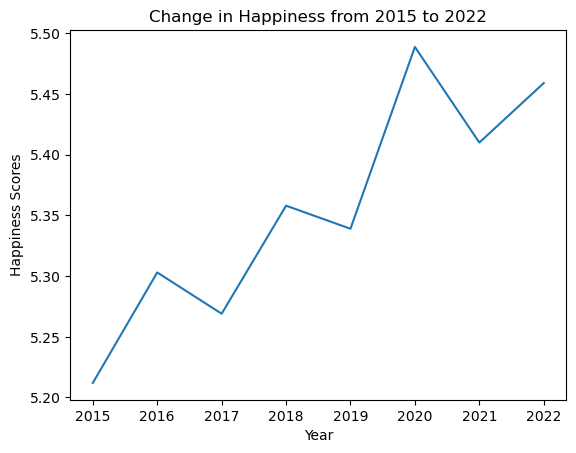

In [34]:
scores = get_happiness_scores("Russia")
plot_country(scores)

In [41]:
#old code but was working, black box at this point

data = pd.read_csv("total_deaths.csv")
total_deaths = pd.DataFrame(data)
total_deaths = total_deaths.iloc[12:]
total_deaths = total_deaths.iloc[::60, :]

population_data = pd.read_csv("population_by_country_2020.csv")
population_data = population_data.iloc[:, :2]

deaths_div_population = pd.DataFrame(index=total_deaths.index, columns=total_deaths.columns)
deaths_div_population.fillna(0, inplace=True)

for country in total_deaths.columns:
    population_series = population_data.loc[population_data['Country (or dependency)'] == country, 'Population (2020)']
    if not population_series.empty:
        population = population_series.values[0]
        #normalized_deaths is a dataframe that is deaths/population
        deaths_div_population[country] = total_deaths[country] / population
    else:
        pass
        
deaths_div_population.fillna(0, inplace=True)
deaths_div_population.replace(0,-1, inplace=True)
deaths_div_population['pop_death_average'] = deaths_div_population.apply(lambda row: row[row > 0].mean(), axis=1)

dates = total_deaths
dates = dates.iloc[:, 0:1]

deaths_div_population = deaths_div_population * 100

comparative_death_div_pop = deaths_div_population.apply(lambda row: row.sub(row.iloc[-1]), axis=1)

for i in range(len(comparative_death_div_pop)):
    for j in range(len(comparative_death_div_pop.columns)):
        if (comparative_death_div_pop.iloc[i,j] < -5):
            comparative_death_div_pop.iloc[i,j] = 0
            
relative_death_per_pop = pd.merge(dates, comparative_death_div_pop, left_index=True, right_index=True)

start_date = 2020
dates = []

for i in range(20):
    dates.append(start_date)
    start_date += 0.16
relative_death_per_pop['date_y'] = dates

In [127]:
def plot_countries_happiness(country_list, ymin, ymax):
    num_countries = len(country_list)
    num_cols = 3
    num_rows = (num_countries + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))
    
    for i, country in enumerate(country_list):
        row = i // num_cols
        col = i % num_cols
        scores = get_happiness_scores(country)
        ax = axes[row][col]
        ax.plot(scores)
        ax.set_title(country)
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel('Year')
        ax.set_ylabel('Happiness Score')
        ax.set_xticks(range(0, 8, 3))
        ax.set_xticklabels(range(2015, 2023, 3))
        ax.plot(scores, marker='o', markersize=4)

        
    fig.subplots_adjust(hspace=0.5)
    plt.show()

def plot_countries_realtive_deaths(country_list):
    n_rows = 3
    n_cols = 3
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12), sharex=True)

    for i, country in enumerate(country_list):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row][col]
        ax.plot(relative_death_per_pop["date_y"], relative_death_per_pop[country], color='red')
        ax.set_title(country)
        ax.set_xlabel('Date')
        ax.set_ylabel('Difference in deaths / pop to Global Avg')
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # show the plot
    plt.show()


In [108]:
happy_df

,Country,Happiness Score,Year
0,Finland,7.587,2015
1,Denmark,7.561,2015
2,Iceland,7.527,2015
3,Switzerland,7.522,2015
4,Netherlands,7.427,2015
...,...,...,...
141,Botswana*,3.471,2022
142,Rwanda*,3.268,2022
143,Zimbabwe,2.995,2022
144,Lebanon,2.955,2022


In [120]:
highest_cols.pop()

'Slovakia'

IndexError: index 3 is out of bounds for axis 0 with size 3

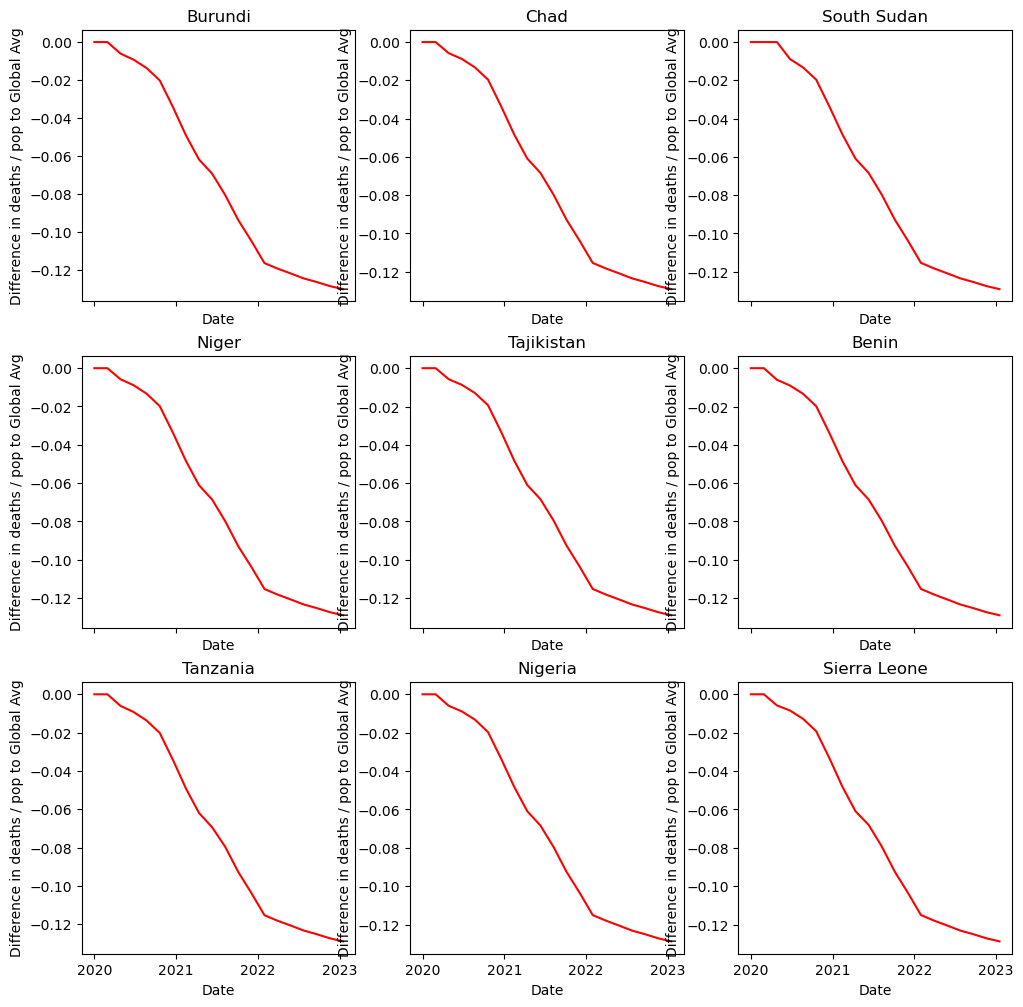

In [110]:
plot_countries_realtive_deaths(highest_cols)

In [111]:
scores = get_happiness_scores_covid('Benin')
print(scores)

[4.587, 4.724100113, 4.794, 4.623]


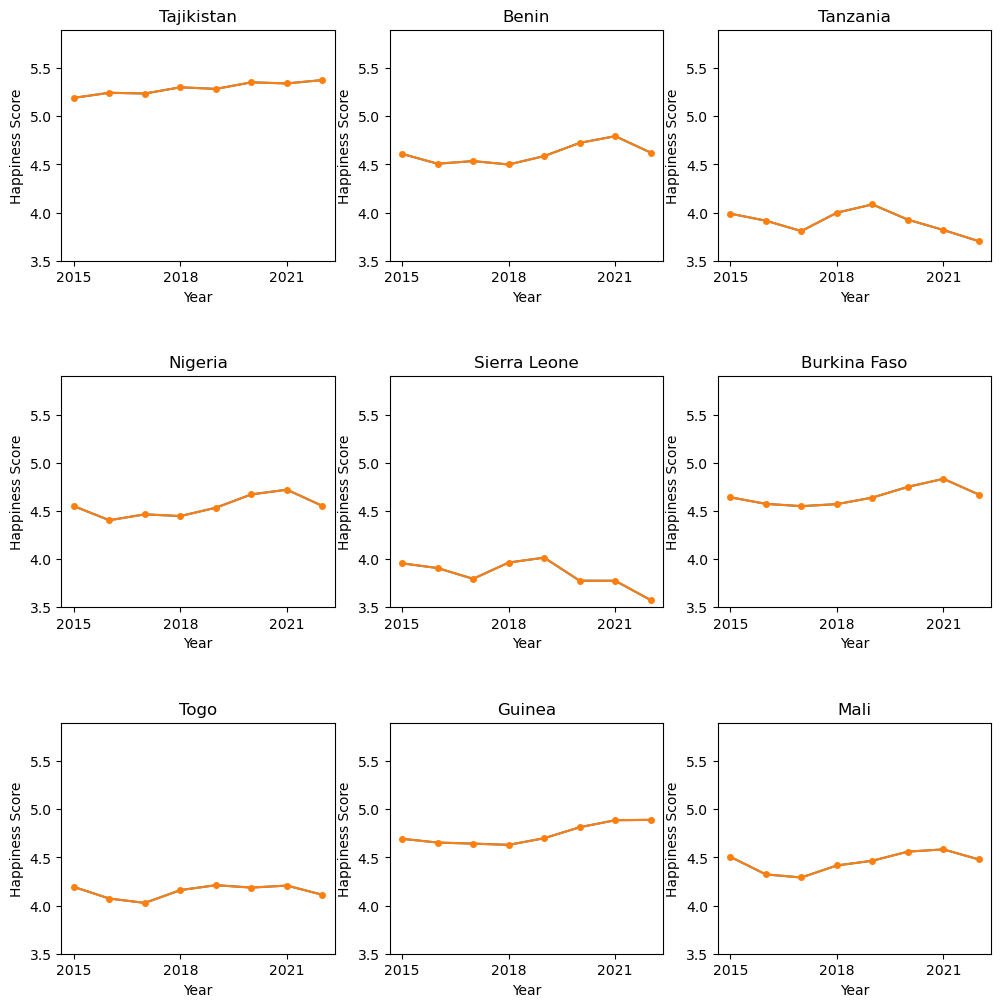

In [133]:
plot_countries_happiness(countries_best_at_deathrate, 3.5, 5.9)

In [73]:
countries_best_at_deathrate = ['Tajikistan', 'Benin', 'Tanzania', 'Nigeria', 'Sierra Leone', 'Burkina Faso', 'Togo', 'Guinea', 'Mali']

In [76]:
def get_happiest_countries_2022():
    # filter rows with year equal to 2022
    happy_2022 = happy_df.loc[happy_df['Year'] == 2022]
    
    # sort values by happiness score in descending order
    sorted_happy = happy_2022.sort_values(by='Happiness Score', ascending=False)
    
    # return the list of country names in descending order of happiness score
    return list(sorted_happy['Country'][:9])

In [80]:
plot_countries_happiness(get_happiest_countries_covid(), 7.1, 7.9)

NameError: name 'get_happiest_countries_covid' is not defined

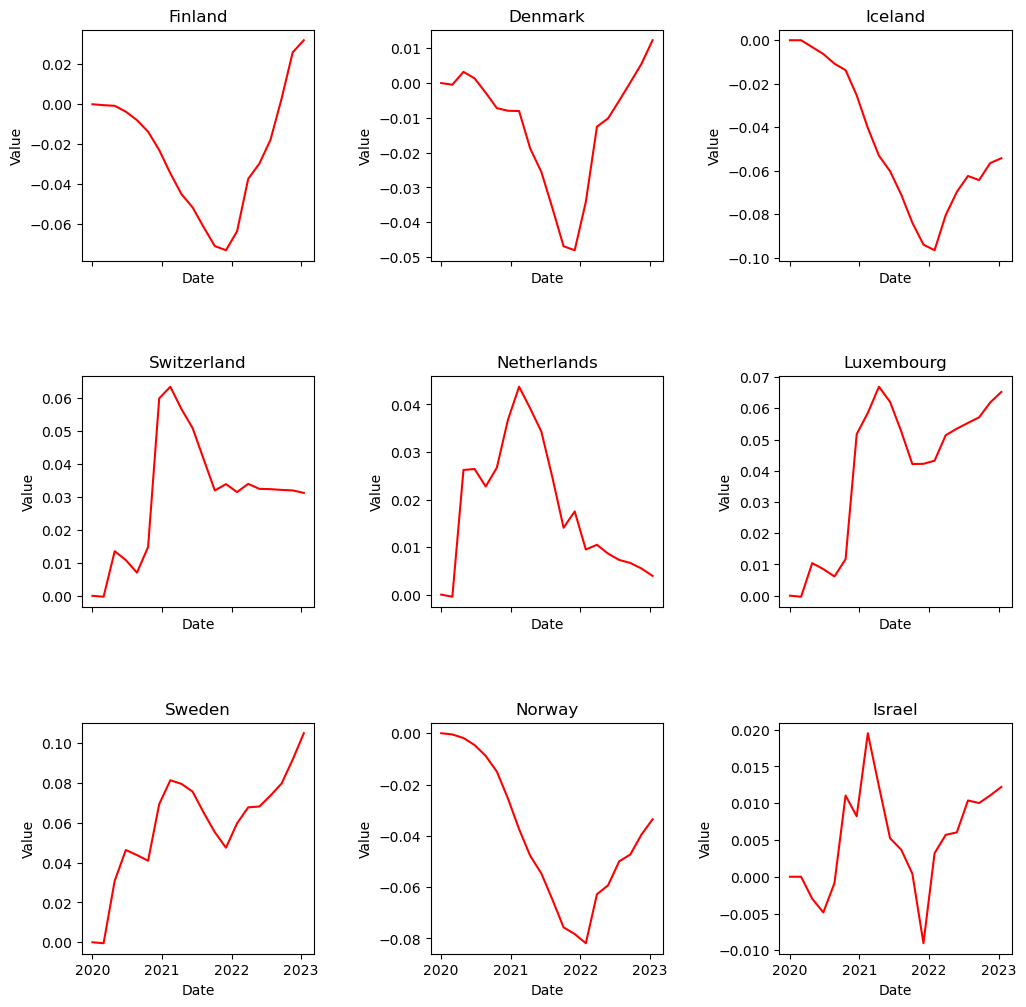

In [32]:
a = get_happiest_countries_2022()
lux_index = a.index('Luxembourg*')
a[lux_index] = 'Luxembourg'
plot_countries_realtive_deaths(a)